In [12]:
import pandas as pd
import numpy as np

import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers



In [13]:
df = pd.read_csv("musk_csv.csv")
X = df.iloc[:,3:169]
Y = df.iloc[:,169]
print(X.shape)
print(Y.shape)



(6598, 166)
(6598,)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_cv, Y_train, Y_cv = train_test_split(X,Y,test_size = 0.2,random_state = 121)

print(X_train.shape)
print(X_cv.shape)
X_train = X_train.as_matrix().reshape(5278,166)
X_cv = X_cv.as_matrix().reshape(1320,166)
X_train = X_train.astype('float32')
X_cv = X_cv.astype('float32')

(5278, 166)
(1320, 166)


C:\Users\Brinta Midya\Anaconda3\envs\pythonCPU\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Brinta Midya\Anaconda3\envs\pythonCPU\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [35]:
n_input = 166 # number of features
n_hidden_1 = 600
n_hidden_2 = 500
n_hidden_3 = 500
n_hidden_4 = 500
n_hidden_5 = 300
n_hidden_6 = 50

Inp = Input(shape=(166,))
x = Dense(n_hidden_1, activation='sigmoid', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='sigmoid', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='sigmoid', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='sigmoid', name = "Hidden_Layer_4")(x)
x = Dense(n_hidden_5, activation='sigmoid', name = "Hidden_Layer_5")(x)
x = Dense(n_hidden_6, activation='sigmoid', name = "Hidden_Layer_6")(x)
output = Dense(1, activation='sigmoid', name = "Output_Layer")(x)

In [61]:
model = Model(Inp,output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 166)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 600)               100200    
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 500)               300500    
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 500)               250500    
_________________________________________________________________
Hidden_Layer_4 (Dense)       (None, 500)               250500    
_________________________________________________________________
Hidden_Layer_5 (Dense)       (None, 300)               150300    
_________________________________________________________________
Hidden_Layer_6 (Dense)       (None, 50)                15050     
__________

In [87]:
learning_rate = 0.0000001
training_epoch = 20
batch_size = 1000
adam = optimizers.adam(lr=learning_rate)

In [88]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [89]:
history1 = model.fit(X_train,Y_train,batch_size=batch_size,epochs = training_epoch,verbose=2,validation_data=(X_cv,Y_cv))

Train on 5278 samples, validate on 1320 samples
Epoch 1/20
 - 8s - loss: 0.2287 - acc: 0.9290 - val_loss: 0.1756 - val_acc: 0.9538
Epoch 2/20
 - 2s - loss: 0.1677 - acc: 0.9566 - val_loss: 0.1310 - val_acc: 0.9598
Epoch 3/20
 - 2s - loss: 0.0818 - acc: 0.9725 - val_loss: 0.0856 - val_acc: 0.9689
Epoch 4/20
 - 2s - loss: 0.0786 - acc: 0.9706 - val_loss: 0.0606 - val_acc: 0.9788
Epoch 5/20
 - 2s - loss: 0.0599 - acc: 0.9790 - val_loss: 0.0579 - val_acc: 0.9780
Epoch 6/20
 - 2s - loss: 0.0398 - acc: 0.9901 - val_loss: 0.0501 - val_acc: 0.9818
Epoch 7/20
 - 2s - loss: 0.0325 - acc: 0.9919 - val_loss: 0.0401 - val_acc: 0.9856
Epoch 8/20
 - 2s - loss: 0.0243 - acc: 0.9943 - val_loss: 0.0316 - val_acc: 0.9886
Epoch 9/20
 - 2s - loss: 0.0212 - acc: 0.9939 - val_loss: 0.0366 - val_acc: 0.9886
Epoch 10/20
 - 2s - loss: 0.0189 - acc: 0.9945 - val_loss: 0.0341 - val_acc: 0.9864
Epoch 11/20
 - 3s - loss: 0.0201 - acc: 0.9937 - val_loss: 0.0341 - val_acc: 0.9856
Epoch 12/20
 - 3s - loss: 0.0172 - ac

In [53]:
print(history1.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


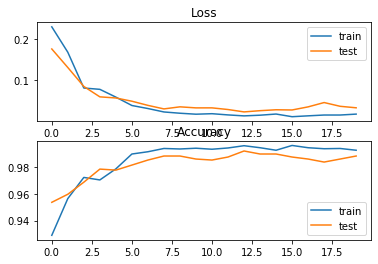

In [90]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history1.history['acc'], label='train')
pyplot.plot(history1.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [91]:
model.save('model_adam_new.h5')
model.save_weights("model_Weights_new.h5")